In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import glob
import math
import os

import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.python.data import Dataset

from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt

import seaborn as sns
from sklearn import metrics

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [3]:
PATH="data/"
OUT_DIR="tf_dnn_files_1"

Load the data:

In [4]:
mnist_dataframe = pd.read_csv(f'{PATH}train.csv', sep = ",", header = [0])
mnist_dataframe = mnist_dataframe.reindex(np.random.permutation(mnist_dataframe.index))
mnist_dataframe

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34365,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2860,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39332,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6049,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9201,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25705,9,0,0,0,0,0,0,0,0,0,...,0,0,191,128,0,0,0,0,0,0
17306,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def parse_labels_and_features(dataset):
    labels = dataset.iloc[:,0]
    features = dataset.iloc[:,1:785]
    features = features.applymap(lambda x: 0.0 if x == 0 else 1.0)
    
    return labels, features

In [6]:
training_targets, training_examples = parse_labels_and_features(mnist_dataframe[:29400])
training_examples

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
validation_targets, validation_examples = parse_labels_and_features(mnist_dataframe[29400:])
validation_examples.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,12600.0,12600.0,12600.0,12600.0,12600.0,12600.0,12600.0,12600.0,12600.0,12600.0,...,12600.0,12600.0,12600.0,12600.0,12600.0,12600.0,12600.0,12600.0,12600.0,12600.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


Define feature columns constructor:

In [8]:
def construct_feature_columns():
    return set([tf.feature_column.numeric_column("pixels", shape = 784)])

Define input functions:

In [9]:
def create_training_input_fn(features, labels, batch_size, num_epochs = 3, shuffle=True):
    def _input_fn(num_epochs = None, shuffle = True):
        idx = np.random.permutation(features.index)
        raw_features = {"pixels": features.reindex(idx)}
        raw_targets  = np.array(labels[idx])
        
        ds = Dataset.from_tensor_slices((raw_features, raw_targets)) #2 Gb limit
        ds = ds.batch(batch_size).repeat(num_epochs)
        
        if shuffle:
            ds = ds.shuffle(1000)
            
        feature_batch, label_batch = ds.make_one_shot_iterator().get_next()
        return feature_batch, label_batch
    return _input_fn

In [10]:
def create_predict_input_fn(features, labels, batch_size):
    def _input_fn():
        raw_features = {"pixels": features.values}
        raw_targets  = np.array(labels)
        
        ds = Dataset.from_tensor_slices((raw_features, raw_targets)) #2Gb limit
        ds = ds.batch(batch_size)
        
        feature_batch, label_batch = ds.make_one_shot_iterator().get_next()
        return feature_batch, label_batch
    return _input_fn

Define model function:

In [11]:
def train_dnn_classification_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear classification model for the MNIST digits dataset.
  
  In addition to training, this function also prints training progress information,
  a plot of the training and validation loss over time, and a confusion
  matrix.
  
  Args:
    learning_rate: An `int`, the learning rate to use.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing the training features.
    training_targets: A `DataFrame` containing the training labels.
    validation_examples: A `DataFrame` containing the validation features.
    validation_targets: A `DataFrame` containing the validation labels.
      
  Returns:
    The trained `LinearClassifier` object.
  """

  periods = 10

  steps_per_period = np.floor(steps / periods)
  # Create the input functions.
  predict_training_input_fn = create_predict_input_fn(
    training_examples, training_targets, batch_size)
  predict_validation_input_fn = create_predict_input_fn(
    validation_examples, validation_targets, batch_size)
  training_input_fn = create_training_input_fn(
    training_examples, training_targets, batch_size)
  
  # Create a LinearClassifier object.
  my_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  classifier = tf.estimator.DNNClassifier(
      feature_columns=construct_feature_columns(),
      n_classes = 10,
      hidden_units=[],
      optimizer=my_optimizer,
      config=tf.estimator.RunConfig(keep_checkpoint_max=1).replace(save_summary_steps=1),
      model_dir=OUT_DIR
  )

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss error (on validation data):")
  training_errors = []
  validation_errors = []
  training_accuracies = [] 
  validation_accuracies = []
    
  """
  train_spec = tf.estimator.TrainSpec(
      input_fn = training_input_fn,
      max_steps = steps)

  eval_spec = tf.estimator.EvalSpec(
      input_fn = predict_validation_input_fn, 
      throttle_secs=120,
      start_delay_secs=30,
      name = "validate")
  """


  for period in range (0, periods):
    # Train the model, starting from the prior state.
    
    classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    """
    tf.estimator.train_and_evaluate(
    classifier,
    train_spec,
    eval_spec)
    
    if period % 5 == 0:
        classifier.evaluate(
                            predict_training_input_fn,
                            steps=steps_per_period,
                            hooks=None,
                            checkpoint_path=OUT_DIR,
                            name="training")
    
        classifier.evaluate(
                            predict_validation_input_fn,
                            steps=steps_per_period,
                            hooks=None,
                            checkpoint_path=OUT_DIR,
                            name="validation")
    """
    # Take a break and compute probabilities.
    training_predictions = list(classifier.predict(input_fn=predict_training_input_fn))
    training_probabilities = np.array([item['probabilities'] for item in training_predictions])
    training_pred_class_id = np.array([item['class_ids'][0] for item in training_predictions])
    training_pred_one_hot = tf.keras.utils.to_categorical(training_pred_class_id,10)
        
    validation_predictions = list(classifier.predict(input_fn=predict_validation_input_fn))
    validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])    
    validation_pred_class_id = np.array([item['class_ids'][0] for item in validation_predictions])
    validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,10)    
    
    # Compute training and validation errors.
    training_log_loss = metrics.log_loss(training_targets, training_pred_one_hot)
    validation_log_loss = metrics.log_loss(validation_targets, validation_pred_one_hot)
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, validation_log_loss))
    # Add the loss metrics from this period to our list.
    training_errors.append(training_log_loss)
    validation_errors.append(validation_log_loss)
    
    train_accuracy = metrics.accuracy_score(training_targets, training_pred_class_id)
    valid_accuracy = metrics.accuracy_score(validation_targets, validation_pred_class_id)
    training_accuracies.append(train_accuracy)
    validation_accuracies.append(valid_accuracy)
    
  print("Model training finished.")
  # Remove event files to save disk space.
  _ = map(os.remove, glob.glob(os.path.join(classifier.model_dir, 'events.out.tfevents*')))
  
  # Calculate final predictions (not probabilities, as above).
  final_predictions = classifier.predict(input_fn=predict_validation_input_fn)
  final_predictions = np.array([item['class_ids'][0] for item in final_predictions])
  
  
  accuracy = metrics.accuracy_score(validation_targets, final_predictions)
  print("Final accuracy (on validation data): %0.2f" % accuracy)

  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.plot(training_errors, label="training")
  plt.plot(validation_errors, label="validation")
  plt.legend()
  plt.show()
  
  # Output a plot of the confusion matrix.
  cm = metrics.confusion_matrix(validation_targets, final_predictions)
  # Normalize the confusion matrix by row (i.e by the number of samples
  # in each class).
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  ax = sns.heatmap(cm_normalized, cmap="bone_r")
  ax.set_aspect(1)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

  plt.title("Training and validation accuracies")
  plt.ylabel("Accuracy")
  plt.xlabel("Periods")
  plt.plot(training_accuracies, label="training")
  plt.plot(validation_accuracies, label="validation")

  return classifier

Train classifier:

Training model...
LogLoss error (on validation data):
  period 00 : 14.16
  period 01 : 11.04
  period 02 : 9.71
  period 03 : 8.74
  period 04 : 8.35
  period 05 : 7.73
  period 06 : 7.09
  period 07 : 6.81
  period 08 : 7.08
  period 09 : 6.79
Model training finished.
Final accuracy (on validation data): 0.80


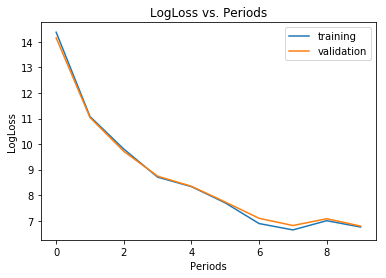

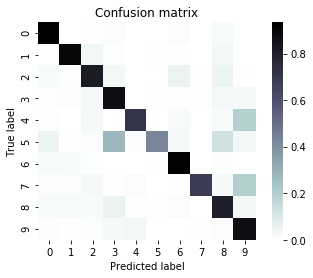

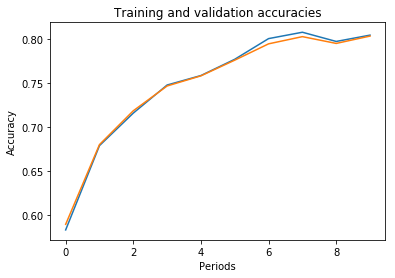

In [12]:
dnn_classifier = train_dnn_classification_model(
             learning_rate=0.01,
             steps=10,
             batch_size=128,
             training_examples=training_examples,
             training_targets=training_targets,
             validation_examples=validation_examples,
             validation_targets=validation_targets)

Make submission:

In [13]:
def create_test_input_fn(features, batch_size):
    def _input_fn():
        raw_features = {"pixels": features.values}
        
        ds = Dataset.from_tensor_slices((raw_features)) #2Gb limit
        ds = ds.batch(batch_size)
        
        feature_batch = ds.make_one_shot_iterator().get_next()
        return feature_batch
    return _input_fn


In [14]:
mnist_test_df  = pd.read_csv(f'{PATH}test.csv', sep = ",", header = [0])
mnist_test_df.describe()

test_input_fn = create_test_input_fn(mnist_test_df.applymap(lambda x: 0.0 if x == 0 else 1.0), 128)

In [15]:
generator = dnn_classifier.predict(input_fn=test_input_fn)
predictions = [next(generator) for i in range(len(mnist_test_df))]
classes = [int(predictions[i]["classes"][0]) for i in range(len(predictions))]

def make_submission_file(classes, filename):
    submission = pd.DataFrame()
    submission["ImageId"] = range(1, 28001)
    submission["Label"] = classes
    submission.set_index("ImageId", inplace=True)
    submission.to_csv(filename)
    
make_submission_file(classes, "mtolstok_mnist_dnn_class.csv")